<a href="https://www.kaggle.com/ivankontic/001-digit-recognizer" target="_parent"><img alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
%config Completer.use_jedi = False

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [ ]:
sample_submission_df = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
train_df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_df = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [ ]:
sample_submission_df.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_df.to_numpy().max()

255

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
train_df.isnull().values.any()

False

In [ ]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X, y = train_df.iloc[:, 1:], train_df['label'].values
test_X = test_df.iloc[:,:]
submission_indices = test_df.index.values + 1

In [ ]:
submission_indices

array([    1,     2,     3, ..., 27998, 27999, 28000])

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
test_X = min_max_scaler.fit_transform(test_X)

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
test_X.shape

(28000, 784)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.01, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(41580, 784) (420, 784) (41580,) (420,)


### CNN

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
def CNN(input_shape=(784), classes=10):
    
    x_input = layers.Input(shape=input_shape)
    X = layers.Reshape(target_shape=(28, 28, 1))(x_input)
    
    X = layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1,1), padding='same')(X)
    X = layers.BatchNormalization(axis=3)(X) 
    X = layers.Activation('relu')(X)
    X = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(X)
    X = layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1,1), padding='same')(X)
    X = layers.BatchNormalization(axis=3)(X) 
    X = layers.Activation('relu')(X)
    X = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(X)
    
    X = layers.Flatten()(X)
    X = layers.Dense(256, activation='relu')(X)
    X = layers.Dropout(rate=0.4)(X)
    X = layers.Dense(128, activation='relu')(X)
    X = layers.Dropout(rate=0.4)(X)
    X = layers.Dense(classes)(X)
    
    model = models.Model(inputs = x_input, outputs = X, name='MNIST_CNN')
    return model

In [ ]:
model = CNN(input_shape = (784), classes = 10)

In [ ]:
model.summary()

Model: "MNIST_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18

In [ ]:
def scheduler(epoch, lr):
    if epoch < 5:
        print('lr: ', 0.001)
        return 0.001
    else:
        print('lr: ', 0.0002)
        return 0.0002

In [ ]:
lrSchedulerCallback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    X_train, y_train, 
    epochs = 15,
    batch_size = 64,
    validation_data = (X_val, y_val),
    validation_batch_size = 64,
    callbacks = [lrSchedulerCallback])

Epoch 1/15
lr:  0.001
650/650 [==============================] - 39s 59ms/step - loss: 0.7533 - accuracy: 0.7653 - val_loss: 0.1235 - val_accuracy: 0.9690
Epoch 2/15
lr:  0.001
650/650 [==============================] - 38s 58ms/step - loss: 0.1411 - accuracy: 0.9611 - val_loss: 0.1180 - val_accuracy: 0.9714
Epoch 3/15
lr:  0.001
650/650 [==============================] - 37s 57ms/step - loss: 0.0915 - accuracy: 0.9743 - val_loss: 0.0667 - val_accuracy: 0.9762
Epoch 4/15
lr:  0.001
650/650 [==============================] - 38s 58ms/step - loss: 0.0828 - accuracy: 0.9760 - val_loss: 0.0827 - val_accuracy: 0.9714
Epoch 5/15
lr:  0.001
650/650 [==============================] - 38s 58ms/step - loss: 0.0592 - accuracy: 0.9831 - val_loss: 0.1058 - val_accuracy: 0.9738
Epoch 6/15
lr:  0.0002
650/650 [==============================] - 38s 59ms/step - loss: 0.0498 - accuracy: 0.9853 - val_loss: 0.0437 - val_accuracy: 0.9810
Epoch 7/15
lr:  0.0002
650/650 [==============================] - 38s

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow, imread

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

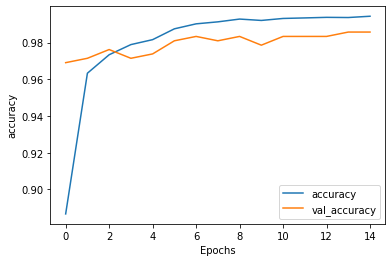

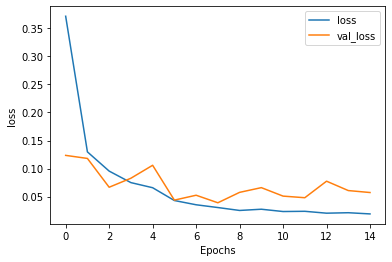

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, "loss")

In [ ]:
output = model(test_X)

In [ ]:
output = tf.argmax(output, 1)

In [ ]:
output.numpy()

array([2, 0, 9, ..., 3, 9, 2])

In [ ]:
submission = pd.DataFrame({'ImageId': submission_indices, 'Label': output.numpy()})
submission.to_csv('submission.csv', index=False)

In [ ]:
test = pd.read_csv('submission.csv')
test

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
